In [9]:
# API Version: https://docs.aws.amazon.com/kendra/latest/dg/create-index.html

In [1]:
!pip install sagemaker boto3 --upgrade
# Restart kernel after install

Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 851.8/851.8 kB 22.0 MB/s eta 0:00:0000:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.9/135.9 kB 29.0 MB/s eta 0:00:00
  Using cached attrs-23.1.0-py3-none-any.whl (61 kB)
  Using cached PyYAML-6.0-cp310-cp310-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_12_x86_64.manylinux2010_x86_64.whl (682 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.0/11.0 MB 105.2 MB/s eta 0:00:0000:0100:01
  Created wheel for sagemaker: filename=sagemaker-2.169.0-py2.py3-none-any.whl size=1158252 sha256=b03c00dab220e22c668fec257ae97c103306f2f8cb04027af18c3daa36ba874d
  Stored in directory: /home/ec2-user/.cache/pip/wheels/42/17/69/c2089332a0db669b4a27888e1d76e825168014112d5eb44231
Successfully built sagemaker
  Attempting uninstall: PyYAML
    Found existing installation: PyYAML 5.4.1
    Uninstalling PyYAML-5.4.1:
      Successf

In [2]:
import sagemaker
import boto3

sess = sagemaker.Session()
region = sess.boto_session.region_name
# sagemaker session bucket -> used for uploading data, models and logs
# sagemaker will automatically create this bucket if it not exists
default_bucket=None
if default_bucket is None and sess is not None:
    # set to default bucket if a bucket name is not given
    default_bucket = sess.default_bucket()

try:
    role = sagemaker.get_execution_role()
except ValueError:
    iam = boto3.client('iam')
    role = iam.get_role(RoleName='sagemaker_execution_role')['Role']['Arn']


print(f"sagemaker role arn: {role}")
print(f"sagemaker bucket: {default_bucket}")
print(f"sagemaker session region: {region}")

sagemaker role arn: arn:aws:iam::808577411626:role/Slab01AIGCPracticerRole
sagemaker bucket: sagemaker-us-west-2-808577411626
sagemaker session region: us-west-2


In [3]:
default_bucket_prefix = "kendra/qa"
qa_source_path = sess.upload_data("cleanroom-emr-msk-qa.csv", 
                                    default_bucket,
                                    default_bucket_prefix)
# The path will be used in building FAQ
print(qa_source_path)

s3://sagemaker-us-west-2-808577411626/kendra/qa/cleanroom-emr-msk-qa.csv


### Build Kendra Index

- In Amazon Kendra product page (console), locate the 'Create Index' button.

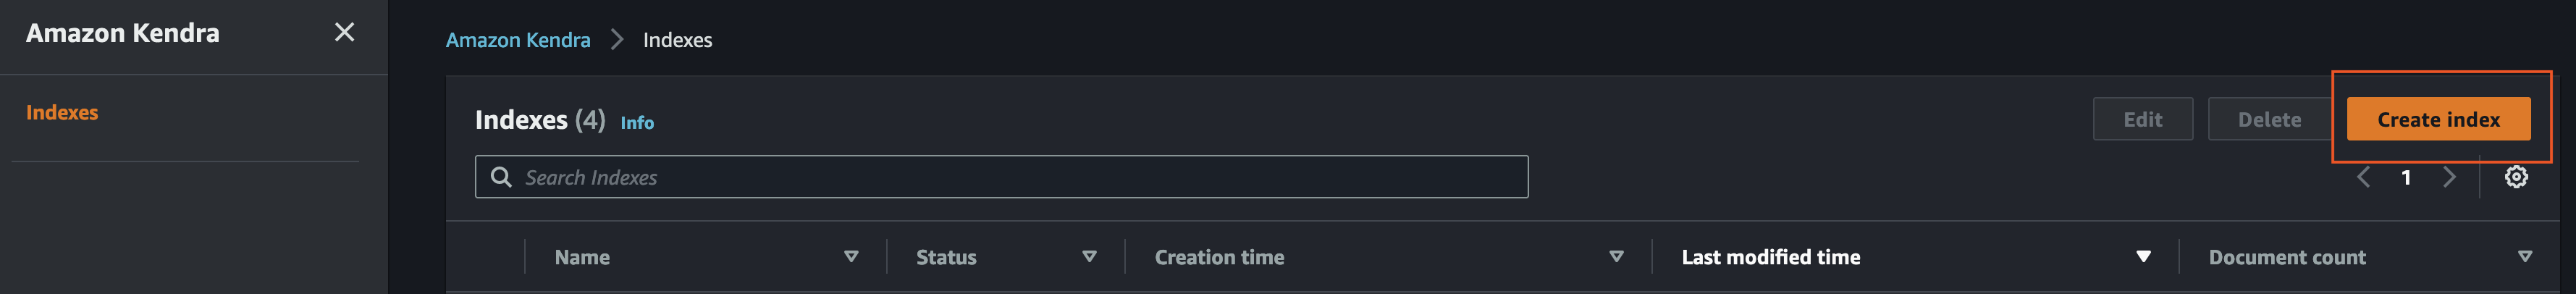

- Specify a custom index 'Name', 'Description'
- 'Create new role' and specify a custom 'Role Name'
- All others left default and click 'Next' till finish

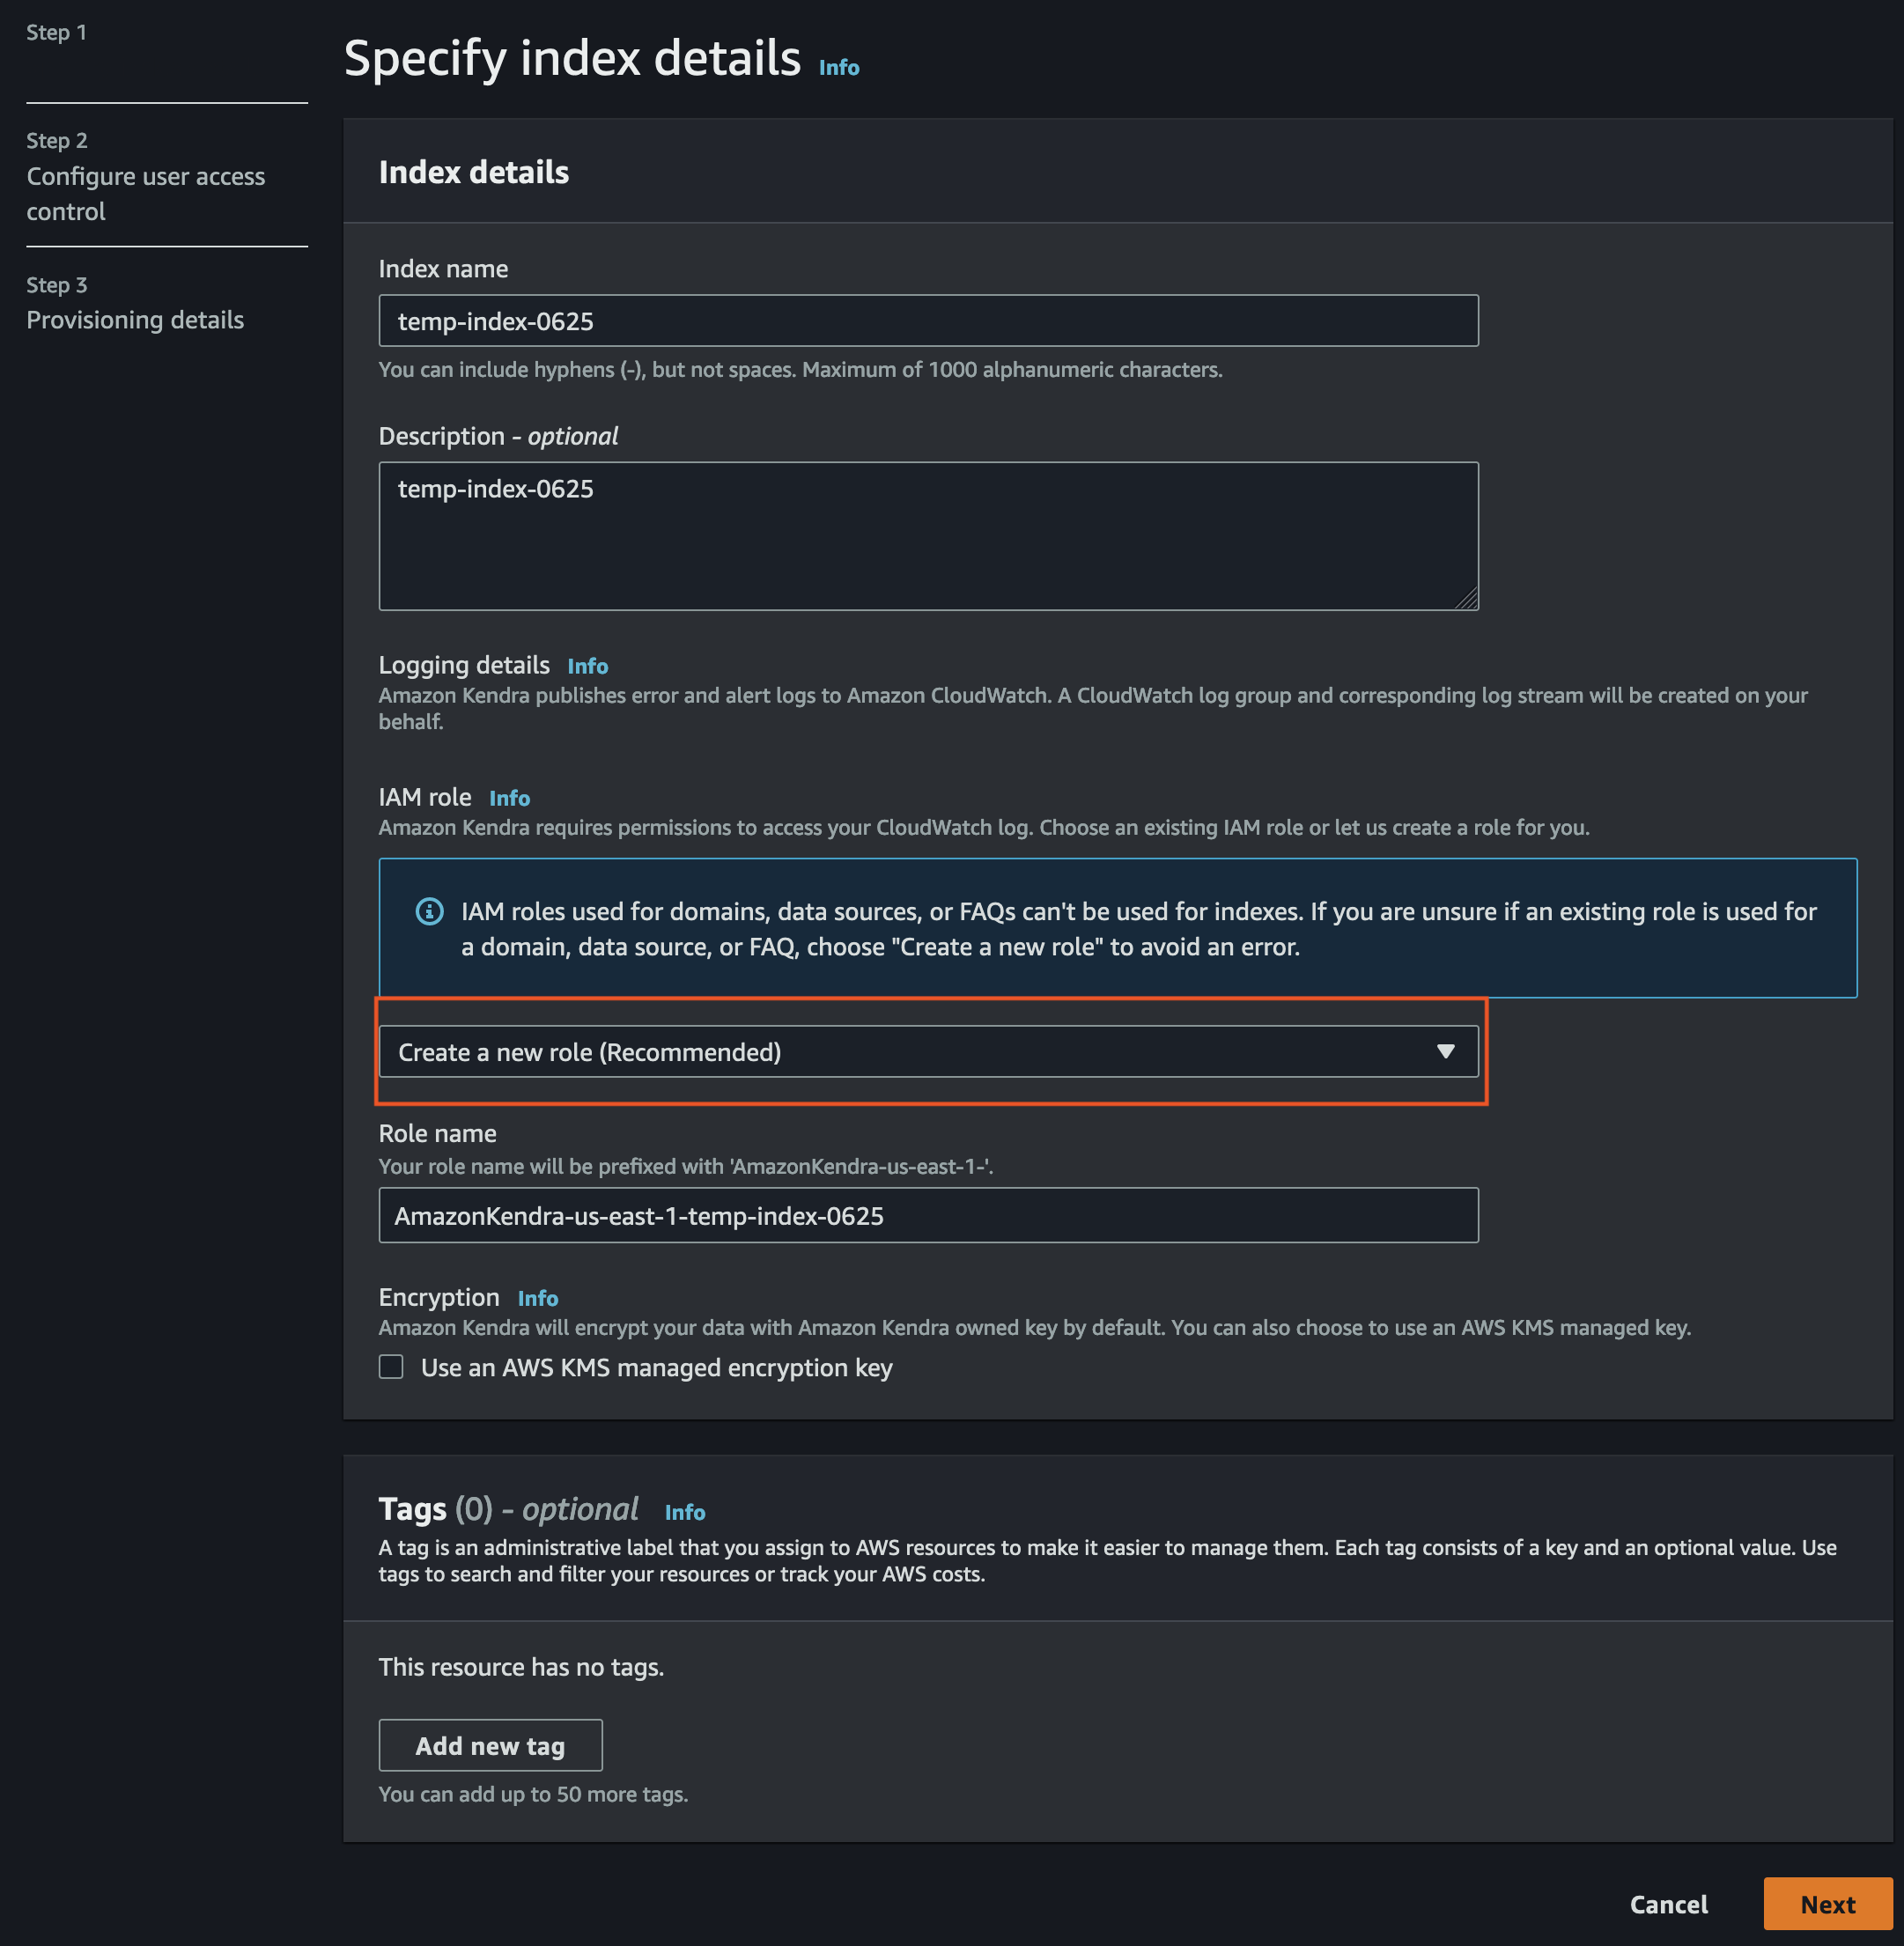

- Check if the index status is 'Active'

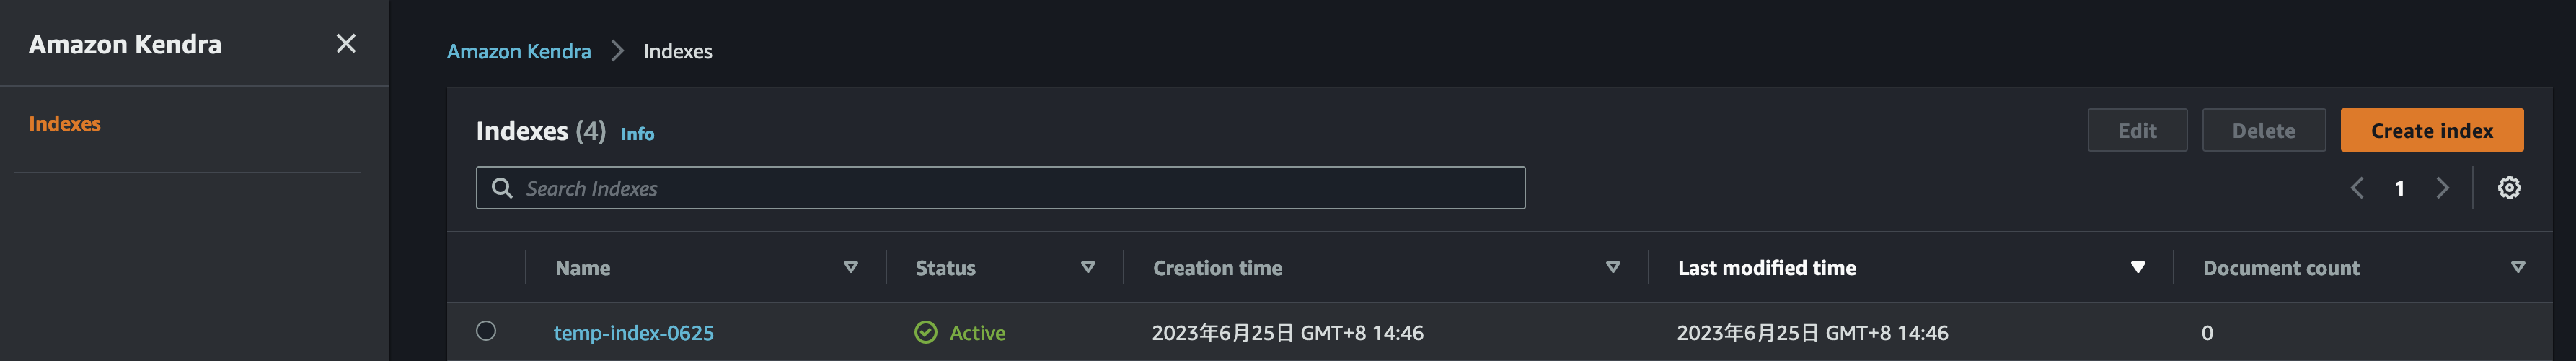

- Copy the 'Index ID' to any text editor
- Click 'FAQs' in the left pannel

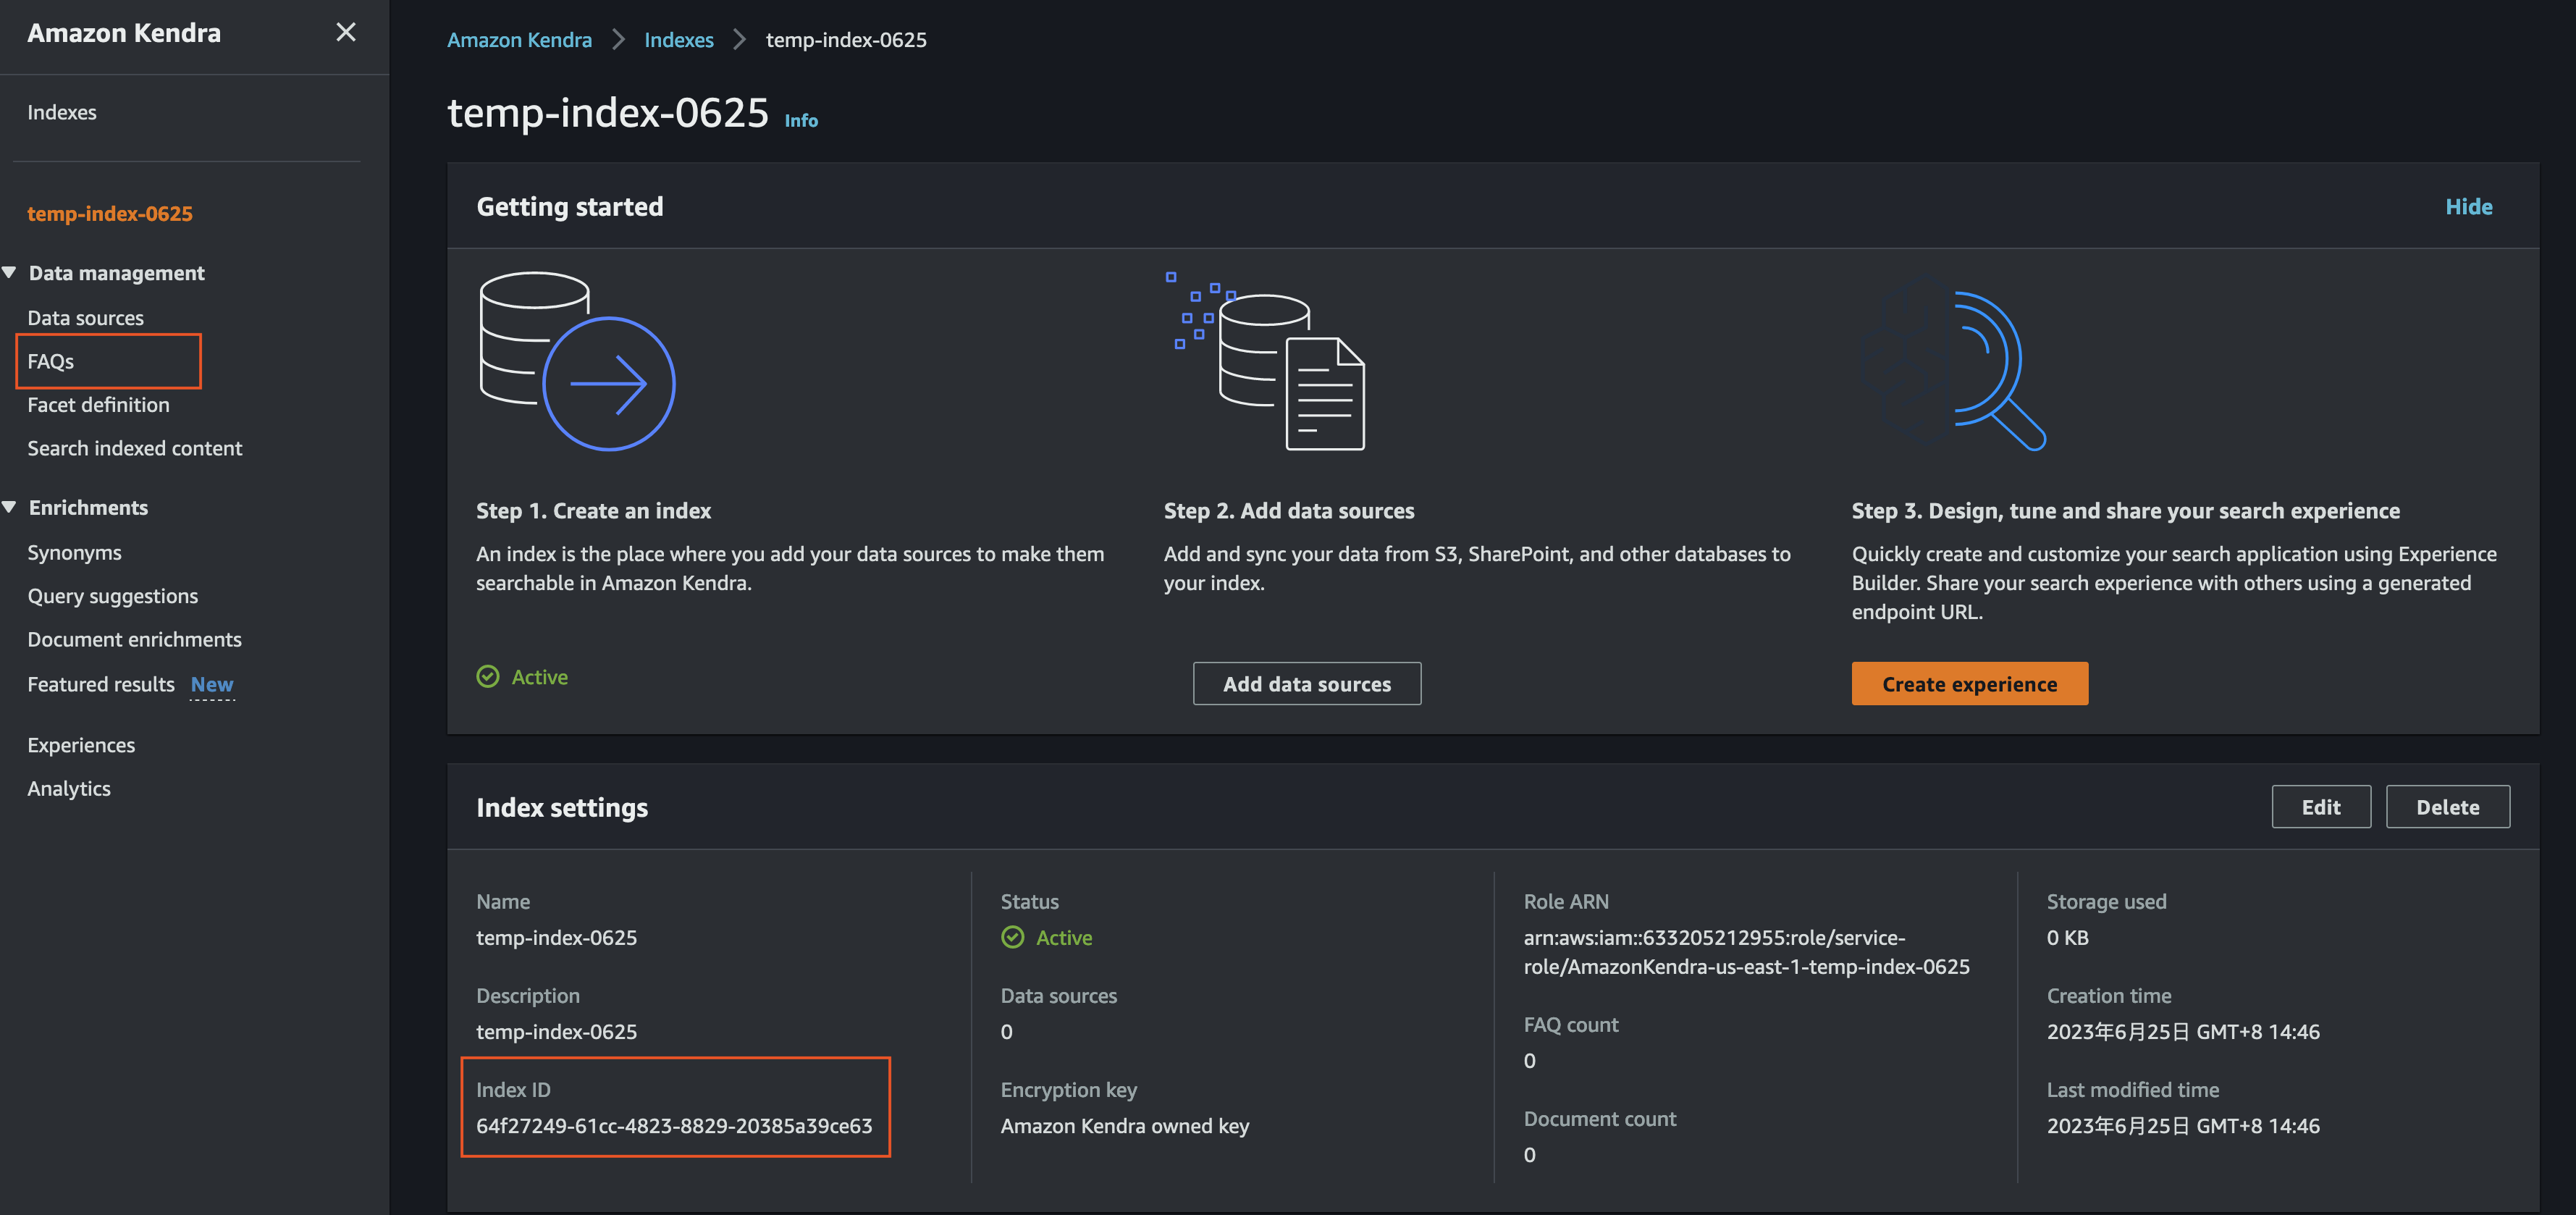

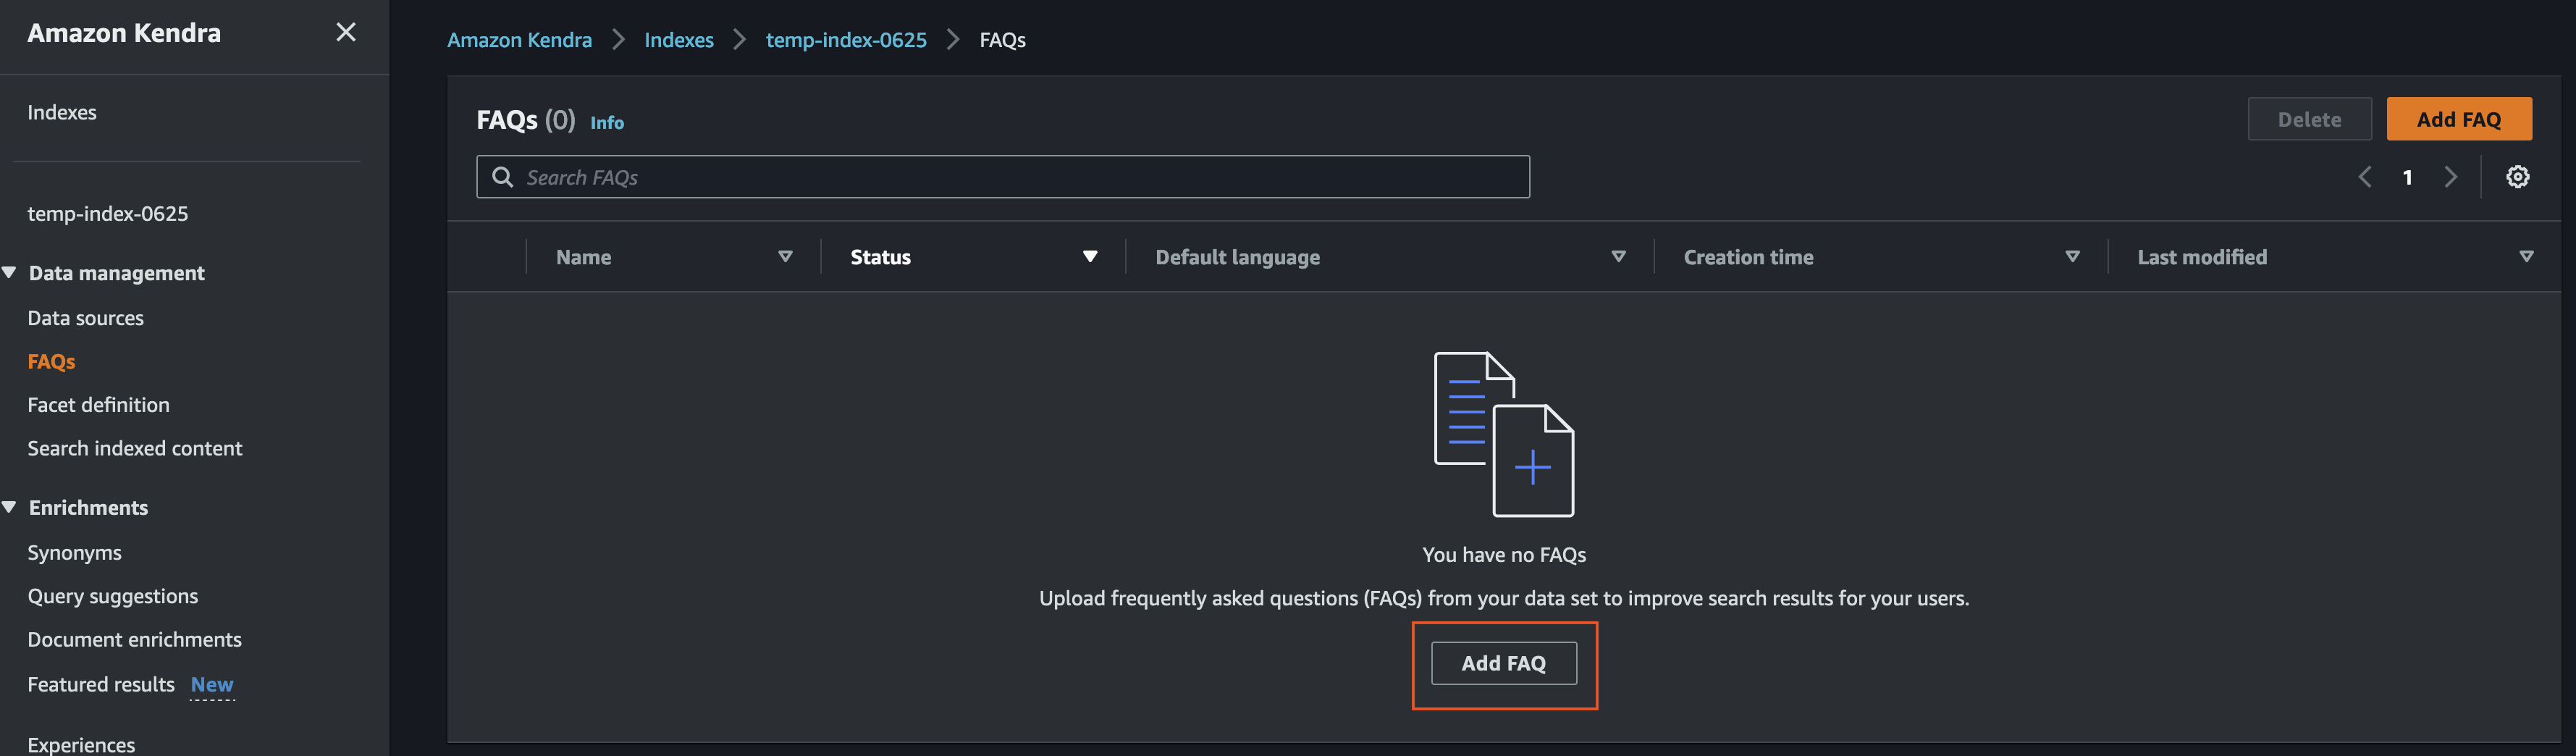

- Specify names and descriptions, etc
- Choose Language code, we use 'Chinese/zh' in this demo
- Choose 'csv-Basic' as file format
- Copy the above generated S3 file path (s3://xxx/xxx/abc.csv) and paste it here
- Choose the above newly defined IAM role name

**AmazonKendra Role should add S3 policy to access data in bucket**

In [ ]:
{
    "Version": "2012-10-17",
    "Statement": [
        {
            "Sid": "Statement1",
            "Effect": "Allow",
            "Action": "S3:*",
            "Resource": [
                "arn:aws:s3:::sagemaker-us-west-2-808577411626",
                "arn:aws:s3:::sagemaker-us-west-2-808577411626/kendra/qa/*"
            ]
        }
    ]
}

**sagemaker_execution_role Role should add Kendra policy to access indexes**

In [ ]:
{
    "Version": "2012-10-17",
    "Statement": [
        {
            "Sid": "VisualEditor0",
            "Effect": "Allow",
            "Action": "kendra:*",
            "Resource": "*"
        }
    ]
}

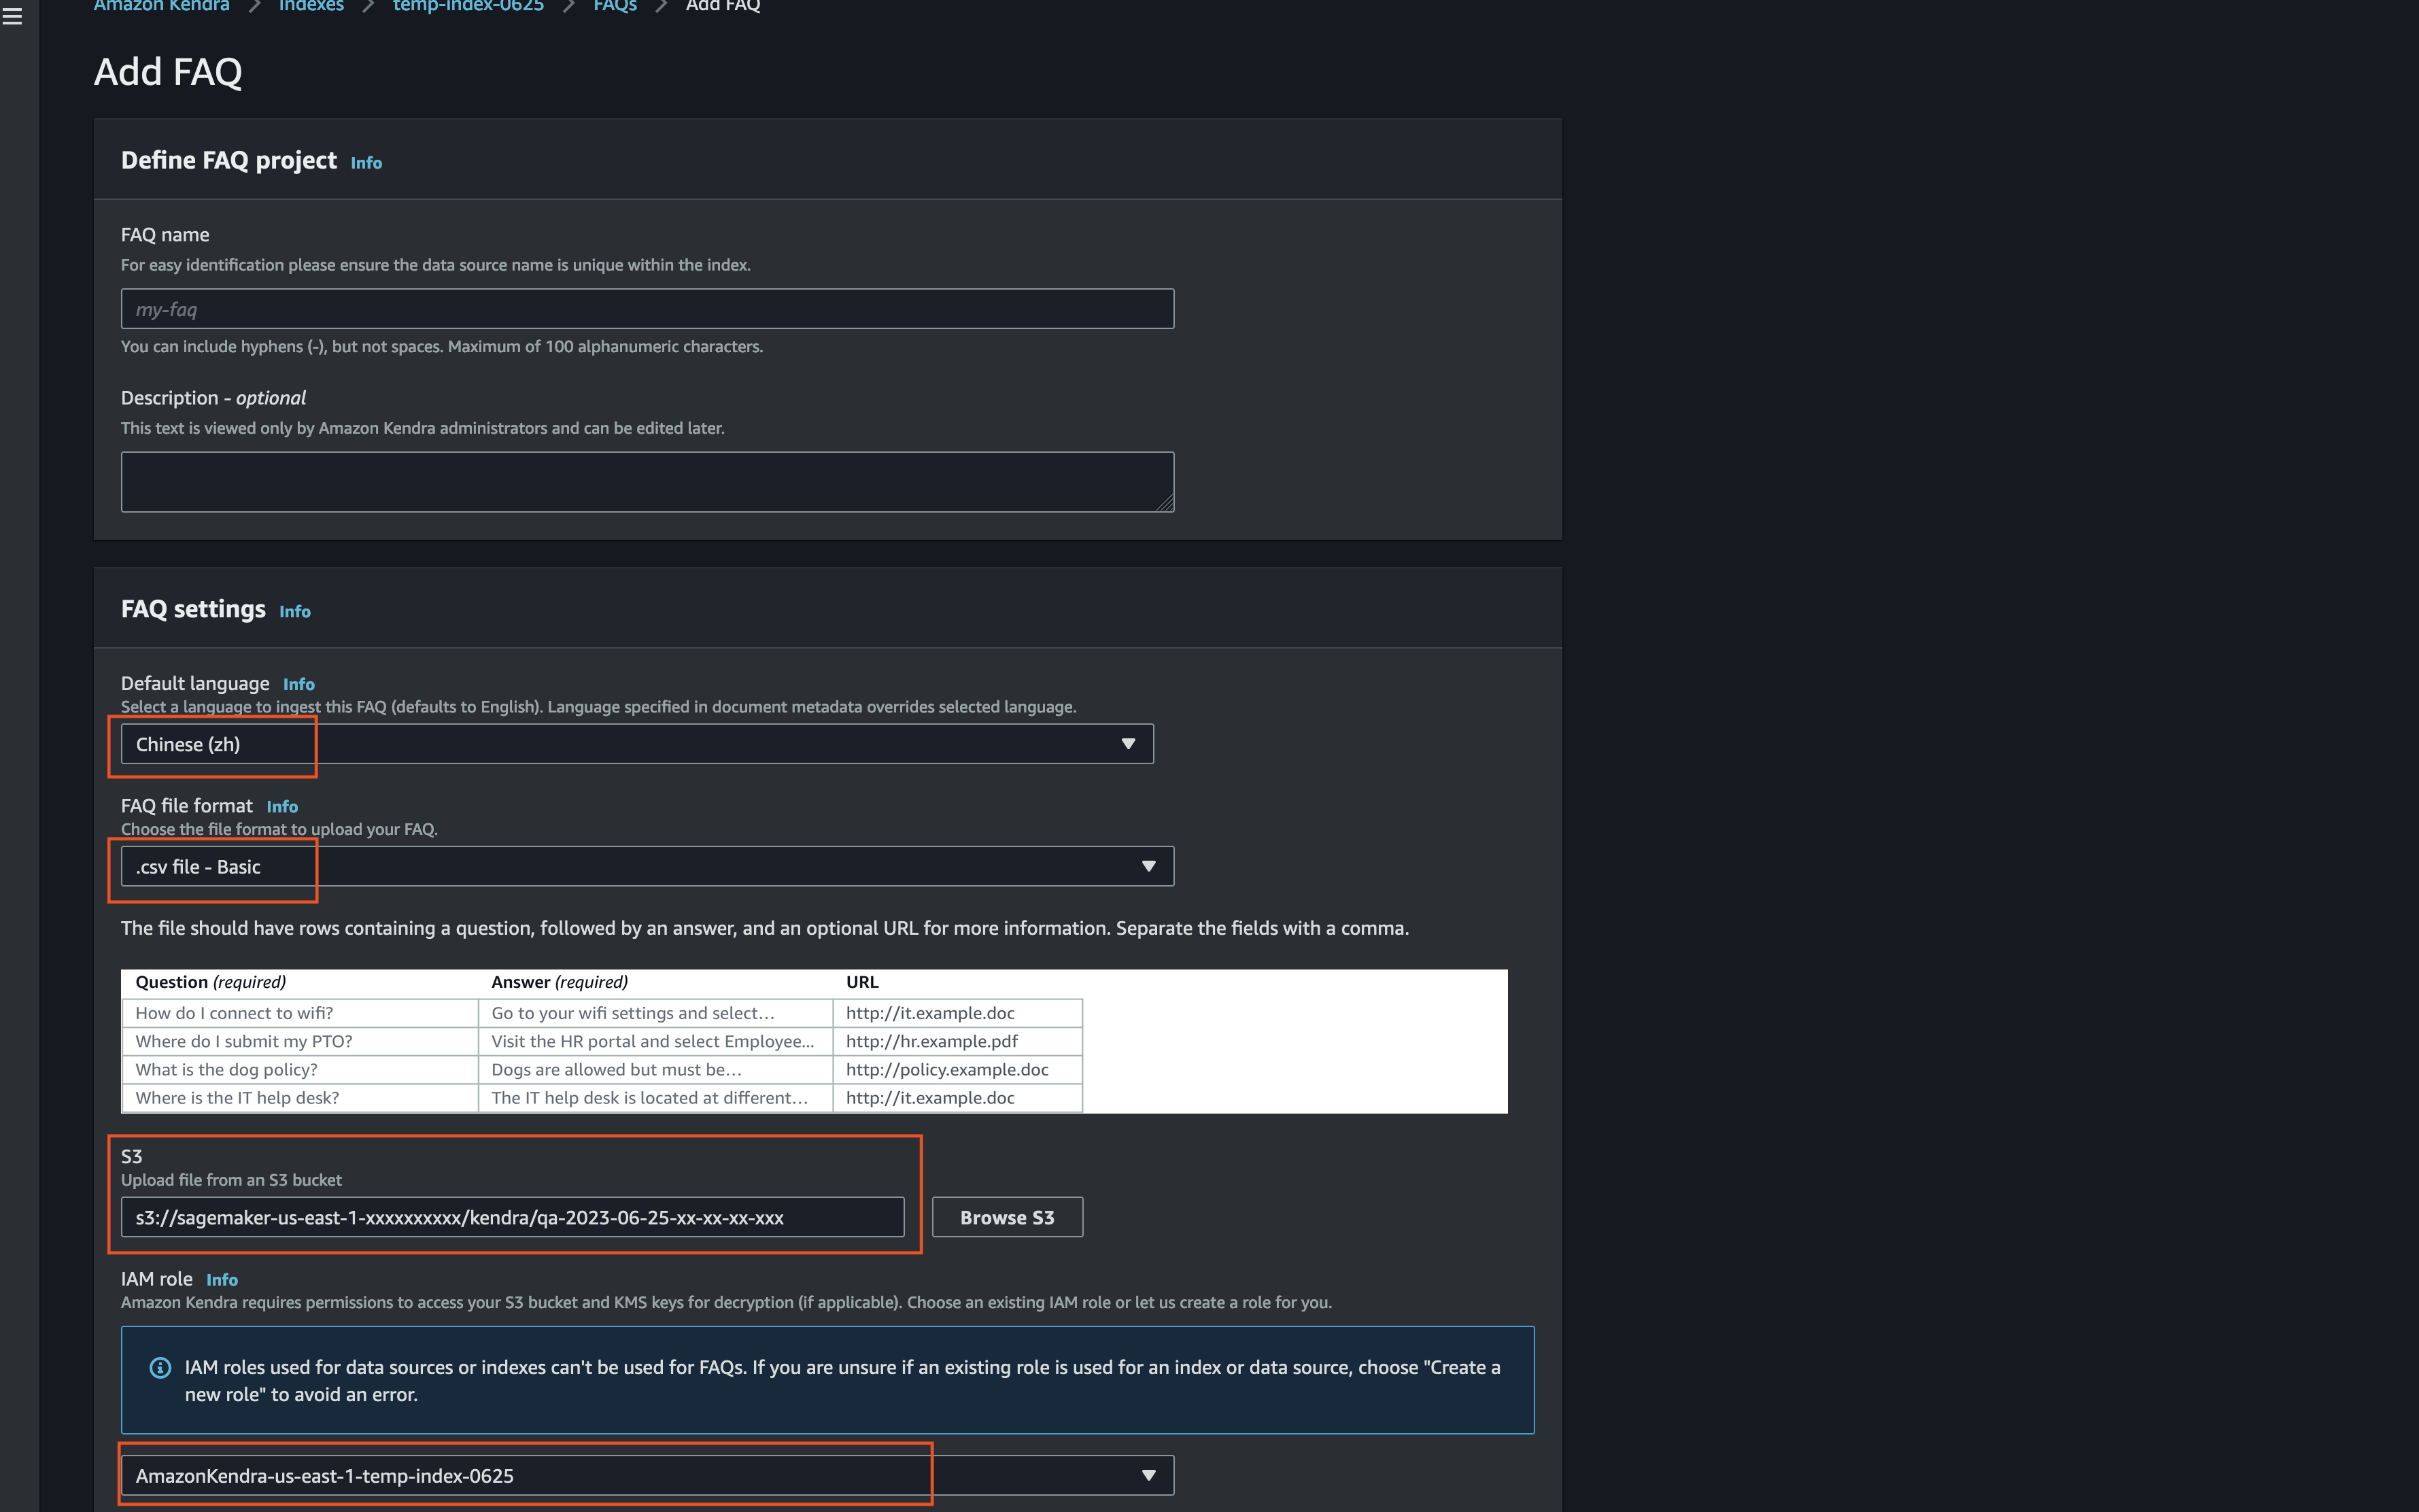

- Wait until the FAQ source in 'Active' state